#### Primeiramente, vamos abrir a base de dados e entender sua estrutura

In [2]:
# importando bibliotecas necessárias
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('beer_reviews.csv')
display(data)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [4]:
# Encontrando a cervejaria com maior overall
data.sort_values(by='review_overall', ascending=False)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
793307,579,Kona Brewing Co.,1293809208,5.0,2.5,3.0,vfgccp,American Pale Ale (APA),4.0,3.5,Fire Rock Pale Ale,5.8,5753
591801,1549,Goose Island Beer Co.,1180667386,5.0,5.0,4.5,bort11,American Double / Imperial Stout,5.0,4.5,Bourbon County Brand Stout,14.5,10672
591818,1549,Goose Island Beer Co.,1175185922,5.0,5.0,5.0,Beezor,American Double / Imperial Stout,4.5,5.0,Bourbon County Brand Stout,14.5,10672
591819,1549,Goose Island Beer Co.,1175135314,5.0,4.5,4.0,zeff80,American Double / Imperial Stout,4.5,5.0,Bourbon County Brand Stout,14.5,10672
591824,1549,Goose Island Beer Co.,1173843941,5.0,4.5,3.5,klewis,American Double / Imperial Stout,5.0,5.0,Bourbon County Brand Stout,14.5,10672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653706,1412,Red Rock Brewing Company,1030008142,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.0,3787
37234,1413,Desert Edge Brewery,1030197670,0.0,2.0,0.0,beernut7,Czech Pilsener,3.0,2.0,Pub Pils,4.0,3806
653695,1412,Red Rock Brewing Company,1030007859,0.0,2.0,0.0,beernut7,Hefeweizen,2.5,2.0,Red Rock Bavarian Weiss,4.0,3788
39667,1413,Desert Edge Brewery,1030266889,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.0,3810


Percebendo que há muitas cervejas com score 5.0 de overall, pensei em criar uma nova coluna com a média geométrica das colunas review_aroma, review_appearance, review_palate e review_taste.

_Por que uma média geométrica?_
- Médias geométricas punem desvios com muito mais força que médias aritméticas. Usando essa estratégia, talvez possamos encontrar a cervejaria com a nota mais sólida. Assim, talvez tenhamos uma avaliação mais rigorosa.

In [26]:
reviews = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']
data['geom_mean'] = sp.stats.mstats.gmean(data[reviews], axis=1).round(2)
display(data)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
1500143,259,Brouwerij St. Bernardus NV,2005-05-16 19:48:24,4.5,5.0,5.0,bceaglejoe,Quadrupel (Quad),5.0,5.0,St. Bernardus Abt 12,10.0,1708,5.0
16705,1199,Founders Brewing Company,2009-07-26 21:36:42,5.0,5.0,5.0,Jcb890,American Double / Imperial Stout,5.0,5.0,Founders CBS Imperial Stout,10.6,47658,5.0
16704,1199,Founders Brewing Company,2009-07-26 21:52:46,5.0,5.0,5.0,reginaldo,American Double / Imperial Stout,5.0,5.0,Founders CBS Imperial Stout,10.6,47658,5.0
1226376,347,Bar Harbor Brewing Company,2007-02-05 17:43:15,4.0,5.0,5.0,skojo,American Stout,5.0,5.0,Cadillac Mountain Stout,6.7,3338,5.0
1490864,313,Brouwerij Westvleteren (Sint-Sixtusabdij van W...,2003-10-16 00:02:40,5.0,5.0,5.0,Gusler,Quadrupel (Quad),5.0,5.0,Trappist Westvleteren 12,10.2,1545,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653706,1412,Red Rock Brewing Company,2002-08-22 09:22:22,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.0,3787,0.0
653740,1412,Red Rock Brewing Company,2002-08-22 09:20:39,0.0,2.0,0.0,beernut7,Dunkelweizen,2.5,2.0,Red Rock Dunkel Weizen,4.0,3786,0.0
39667,1413,Desert Edge Brewery,2002-08-25 09:14:49,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.0,3810,0.0
653726,1412,Red Rock Brewing Company,2002-08-22 09:15:37,0.0,2.0,0.0,beernut7,German Pilsener,3.0,1.5,Red Rock Pilsner,4.0,3822,0.0


Agora, ordenamos pela média geométrica.

In [27]:
data = data.sort_values(by='geom_mean', ascending=False)
display(data)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
1500143,259,Brouwerij St. Bernardus NV,2005-05-16 19:48:24,4.5,5.0,5.0,bceaglejoe,Quadrupel (Quad),5.0,5.0,St. Bernardus Abt 12,10.00,1708,5.0
881743,147,Stone Brewing Co.,2009-09-18 23:30:30,5.0,5.0,5.0,apbarwood,Russian Imperial Stout,5.0,5.0,Stone Imperial Russian Stout,10.50,1160,5.0
1133098,863,Russian River Brewing Company,2012-01-06 00:14:14,5.0,5.0,5.0,JoEBoBpr,American Wild Ale,5.0,5.0,Toronado 20th Anniversary Ale,10.43,38094,5.0
665192,2216,Brouwerij Drie Fonteinen,2011-11-05 22:37:36,5.0,5.0,5.0,AleWatcher,Gueuze,5.0,5.0,Armand'4 Oude Geuze Zomer (Summer),6.00,70356,5.0
33570,1199,Founders Brewing Company,2009-03-23 12:32:28,4.5,5.0,5.0,raninator84,American Double / Imperial Stout,5.0,5.0,Founders KBS (Kentucky Breakfast Stout),11.20,19960,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653706,1412,Red Rock Brewing Company,2002-08-22 09:22:22,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.00,3787,0.0
653740,1412,Red Rock Brewing Company,2002-08-22 09:20:39,0.0,2.0,0.0,beernut7,Dunkelweizen,2.5,2.0,Red Rock Dunkel Weizen,4.00,3786,0.0
39667,1413,Desert Edge Brewery,2002-08-25 09:14:49,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.00,3810,0.0
653726,1412,Red Rock Brewing Company,2002-08-22 09:15:37,0.0,2.0,0.0,beernut7,German Pilsener,3.0,1.5,Red Rock Pilsner,4.00,3822,0.0


Algo bem confuso nesse resultado é que algumas cervejas com média geométrica 5 nos parâmetros avaliados não têm média 5 de overall...

Usando datetime na coluna de review_time:

In [28]:
data['review_time'] = pd.to_datetime(data['review_time'], unit='s')
display(data)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
1500143,259,Brouwerij St. Bernardus NV,2005-05-16 19:48:24,4.5,5.0,5.0,bceaglejoe,Quadrupel (Quad),5.0,5.0,St. Bernardus Abt 12,10.00,1708,5.0
881743,147,Stone Brewing Co.,2009-09-18 23:30:30,5.0,5.0,5.0,apbarwood,Russian Imperial Stout,5.0,5.0,Stone Imperial Russian Stout,10.50,1160,5.0
1133098,863,Russian River Brewing Company,2012-01-06 00:14:14,5.0,5.0,5.0,JoEBoBpr,American Wild Ale,5.0,5.0,Toronado 20th Anniversary Ale,10.43,38094,5.0
665192,2216,Brouwerij Drie Fonteinen,2011-11-05 22:37:36,5.0,5.0,5.0,AleWatcher,Gueuze,5.0,5.0,Armand'4 Oude Geuze Zomer (Summer),6.00,70356,5.0
33570,1199,Founders Brewing Company,2009-03-23 12:32:28,4.5,5.0,5.0,raninator84,American Double / Imperial Stout,5.0,5.0,Founders KBS (Kentucky Breakfast Stout),11.20,19960,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653706,1412,Red Rock Brewing Company,2002-08-22 09:22:22,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.00,3787,0.0
653740,1412,Red Rock Brewing Company,2002-08-22 09:20:39,0.0,2.0,0.0,beernut7,Dunkelweizen,2.5,2.0,Red Rock Dunkel Weizen,4.00,3786,0.0
39667,1413,Desert Edge Brewery,2002-08-25 09:14:49,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.00,3810,0.0
653726,1412,Red Rock Brewing Company,2002-08-22 09:15:37,0.0,2.0,0.0,beernut7,German Pilsener,3.0,1.5,Red Rock Pilsner,4.00,3822,0.0


Para ver se a média geométrica tem alguma relação positiva com o overall, resolvi fazer um regplot

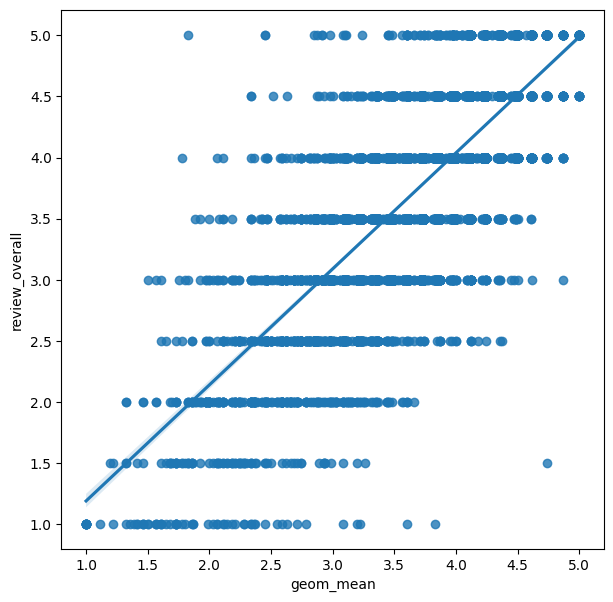

In [29]:
#fazendo uma amostragem pra fazer o plot já que a base é bem grande
data_amostra = data.sample(n=10000, random_state=1)
plt.figure(figsize=(7,7))
sns.regplot(data=data_amostra, x='geom_mean', y='review_overall')
plt.show()

In [30]:
# agora, vendo a correlação em si
data[['review_overall', 'geom_mean']].corr()

,review_overall,geom_mean
review_overall,1.000000,0.778988
geom_mean,0.778988,1.000000


Até que a correlação é forte!

Tentando agora encontrar as melhores cervejarias filtrando o df para mostrar somente as cervejas que receberam tanto overall quanto média geométrica 5/5

In [40]:
melhores_cervejas = data[(data['review_overall'] == 5) & (data['geom_mean'] == 5)]
                                            # dando display por ordem de id
display(melhores_cervejas.sort_values(by='brewery_id'))

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
45950,1,"Plzensky Prazdroj, a. s.",2010-05-26 07:08:19,5.0,5.0,5.0,appenzeller,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
46433,1,"Plzensky Prazdroj, a. s.",2007-09-11 13:48:53,5.0,5.0,5.0,sudz42,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
46509,1,"Plzensky Prazdroj, a. s.",2007-04-07 14:29:27,5.0,5.0,5.0,janubio,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
46382,1,"Plzensky Prazdroj, a. s.",2007-12-28 07:03:07,5.0,5.0,5.0,horseblanket,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
45998,1,"Plzensky Prazdroj, a. s.",2010-02-07 21:40:14,5.0,5.0,5.0,jdlaughead,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378647,27039,The Alchemist,2011-09-15 17:47:30,5.0,5.0,5.0,seanwhite,American Double / Imperial IPA,5.0,5.0,Heady Topper,8.0,16814,5.0
378848,27039,The Alchemist,2009-01-28 23:19:37,5.0,5.0,5.0,spittingoutteeth,American Double / Imperial IPA,5.0,5.0,Heady Topper,8.0,16814,5.0
378843,27039,The Alchemist,2010-03-06 00:36:18,5.0,5.0,5.0,kingcrowing,American Double / Imperial IPA,5.0,5.0,Heady Topper,8.0,16814,5.0
378492,27039,The Alchemist,2011-10-28 20:12:17,5.0,5.0,5.0,cbwufpack,American Double / Imperial IPA,5.0,5.0,Heady Topper,8.0,16814,5.0


Fazendo um df e depois um gráfico com as cervejas que mais foram perfeitamente avaliadas (5/5 em geom mean e overall)

In [41]:
contagem_cervejas = melhores_cervejas['beer_name'].value_counts().reset_index()
contagem_cervejas.columns = ['beer_name', 'count']
contagem_cervejas = contagem_cervejas.sort_values(by='count', ascending=False)
display(contagem_cervejas)

,beer_name,count
0,Pliny The Elder,156
1,Trappist Westvleteren 12,134
2,Founders KBS (Kentucky Breakfast Stout),112
3,Pliny The Younger,92
4,Trappistes Rochefort 10,84
...,...,...
1049,Fuller's London Porter,1
1048,Beer Geek Breakfast,1
1047,Merry Monks' Ale,1
1046,Blackberry Porter,1


C:\Users\rafae\AppData\Local\Temp\ipykernel_17620\1382376381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='beer_name', data=top_cervejas, palette='YlOrBr')


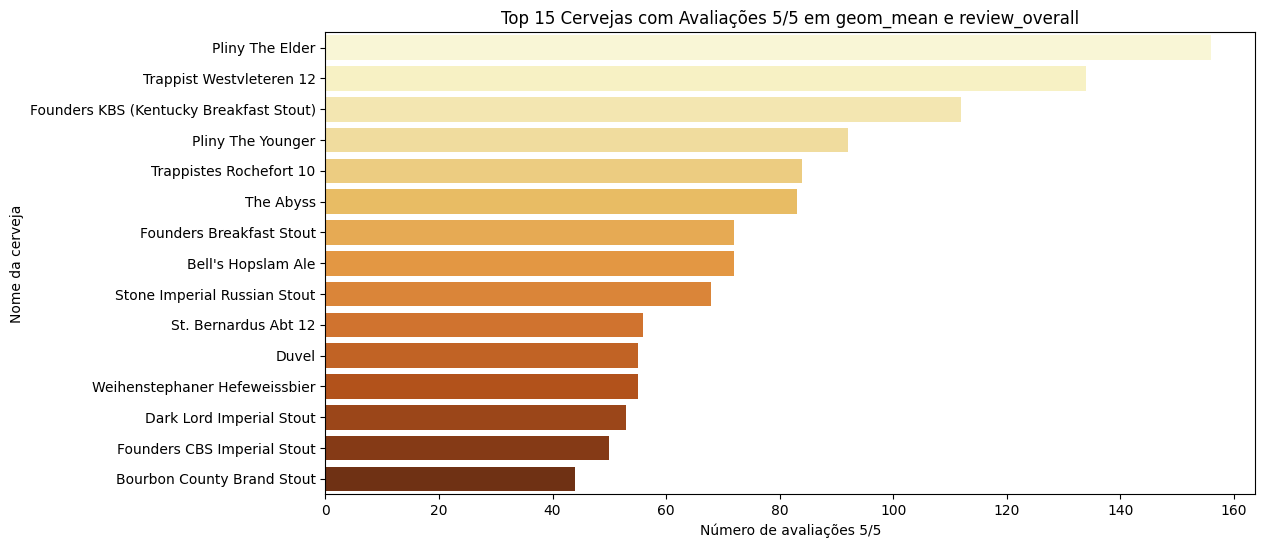

In [44]:
top_cervejas = contagem_cervejas.head(15)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='beer_name', data=top_cervejas, palette='YlOrBr')
plt.xlabel('Número de avaliações 5/5')
plt.ylabel('Nome da cerveja')
plt.title('Top 15 Cervejas com Avaliações 5/5 em geom_mean e review_overall')
plt.show()